<a href="https://colab.research.google.com/github/Darianna-dev/alura_store_latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [619]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [620]:
tiendas = [tienda, tienda2, tienda3, tienda4]


#1. Análisis de facturación



In [621]:
def ingreso_total (tienda):
  ingreso_total = sum(tienda['Precio'])
  return ingreso_total


ingresos_totales=[]
for index, tienda in enumerate(tiendas, start=1):
    ingreso_total_tienda = ingreso_total(tienda)
    ingresos_totales.append(ingreso_total_tienda) # Aca se guardan los ingresos totales de cada tienda
    print(f"El ingreso total de la tienda {index} fue de ${ingreso_total_tienda}")
    print('---------------------------------------------------------')


El ingreso total de la tienda 1 fue de $1150880400.0
---------------------------------------------------------
El ingreso total de la tienda 2 fue de $1116343500.0
---------------------------------------------------------
El ingreso total de la tienda 3 fue de $1098019600.0
---------------------------------------------------------
El ingreso total de la tienda 4 fue de $1038375700.0
---------------------------------------------------------


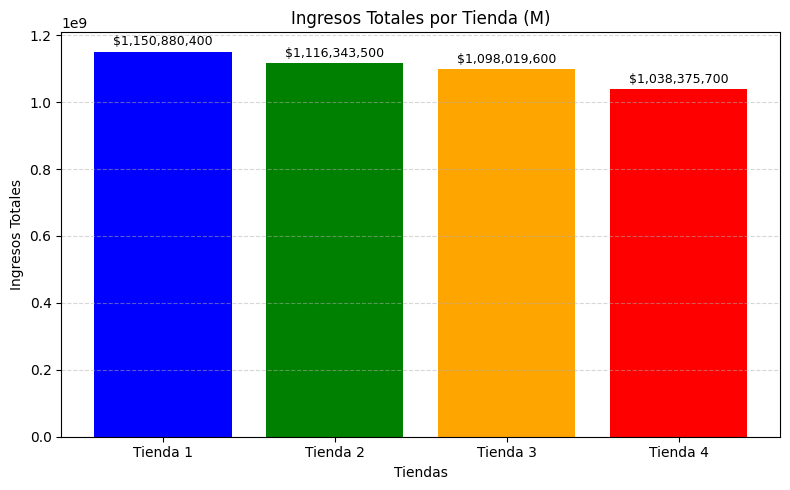

In [622]:
import matplotlib.pyplot as plt

# Nombres de las tiendas para el eje X
nombres_tiendas = [f"Tienda {i+1}" for i in range(len(tiendas))]
colors=['blue', 'green', 'orange', 'red']

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
barras = plt.bar(nombres_tiendas, ingresos_totales, color=colors)
plt.xlabel("Tiendas")
plt.ylabel("Ingresos Totales")
# plt.yticks([0.4,0.8,1.2])
plt.title("Ingresos Totales por Tienda (M)")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Etiquetas encima de cada barra
for barra in barras:
    y = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, y + 10000000, f"${int(y):,}",
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [623]:
def catidad_categorias(tienda):
  categorias = list(tienda['Categoría del Producto'].unique()) # obtenemos una lista con los nombres de cada categoria
  lista_cant_categoria = []
  for categoria in categorias:
    cantidad = (tienda[tienda['Categoría del Producto'] == categoria]['Precio']).count()
    lista_cant_categoria.append([categoria, int(cantidad)])
  return lista_cant_categoria

def categoria_mas_vendida(cant_categorias = []):
  try:
    if type(cant_categorias) != list:
      raise TypeError('Debe pasar como argumento una lista')

    mayor_cant = max(cant_categorias, default=0, key=lambda x : x[1])
    return mayor_cant
  except TypeError as e:
    print(e)

lista_max_cant_categorias = []
lista_max_nombres_categorias = []
for index, tienda in enumerate(tiendas, start=1):
  cant_categoria_tienda_index = catidad_categorias(tienda)
  cant_categoria_tienda_index = sorted(cant_categoria_tienda_index, key=lambda x: x[0])
  cant_tienda_index = categoria_mas_vendida(cant_categoria_tienda_index)
  lista_max_nombres_categorias.append(cant_tienda_index[0])
  lista_max_cant_categorias.append(cant_tienda_index[1])
  print(f'La Categoria mas vendida en la tienda {index} fue: {cant_tienda_index[0]} con: {cant_tienda_index[1]} unidades. ')
  print('---------------------------------------------------------')


La Categoria mas vendida en la tienda 1 fue: Muebles con: 465 unidades. 
---------------------------------------------------------
La Categoria mas vendida en la tienda 2 fue: Muebles con: 442 unidades. 
---------------------------------------------------------
La Categoria mas vendida en la tienda 3 fue: Muebles con: 499 unidades. 
---------------------------------------------------------
La Categoria mas vendida en la tienda 4 fue: Muebles con: 480 unidades. 
---------------------------------------------------------


['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
['Muebles', 'Muebles', 'Muebles', 'Muebles']
[465, 442, 499, 480]
[('Tienda 1', 'Muebles'), ('Tienda 2', 'Muebles'), ('Tienda 3', 'Muebles'), ('Tienda 4', 'Muebles')]


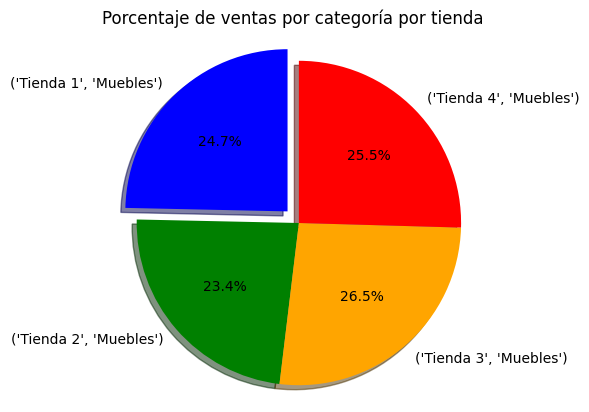

In [624]:
# print(lista_max_categorias)
nombres_tiendas = [f"Tienda {i+1}" for i in range(len(tiendas))]
print(nombres_tiendas)
print(lista_max_nombres_categorias)
print(lista_max_cant_categorias)
lista_nombres_tiendas_categorias = list(zip(nombres_tiendas, lista_max_nombres_categorias))

print(lista_nombres_tiendas_categorias)
explode = (0.1, 0, 0, 0)
colors=['blue', 'green', 'orange', 'red']

plt.pie(lista_max_cant_categorias, labels=lista_nombres_tiendas_categorias, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)
plt.axis('equal')
plt.title('Porcentaje de ventas por categoría por tienda')
plt.show()

# 3. Calificación promedio de la tienda


La calificación promedio de la tienda 1 es de: 3.976685036032217
---------------------------------------------------------
La calificación promedio de la tienda 2 es de: 4.037303942348453
---------------------------------------------------------
La calificación promedio de la tienda 3 es de: 4.048325561678677
---------------------------------------------------------
La calificación promedio de la tienda 4 es de: 3.9957591178965224
---------------------------------------------------------


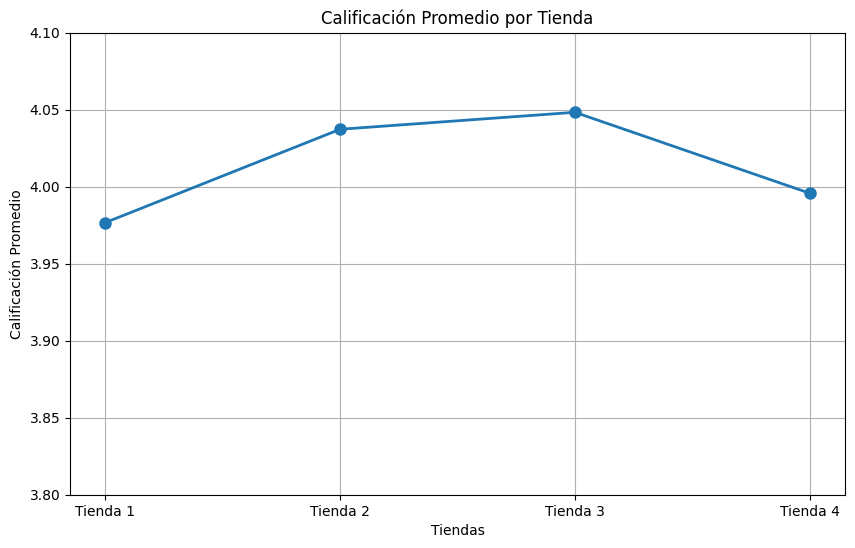

In [625]:
calificaciones = []
for index, tienda in enumerate(tiendas, start=1):
  calificacion_tienda = tienda['Calificación'].mean()
  calificaciones.append(calificacion_tienda)
  print(f"La calificación promedio de la tienda {index} es de: {calificacion_tienda}")
  print('---------------------------------------------------------')


plt.figure(figsize=(10, 6))
plt.plot(nombres_tiendas, calificaciones,  marker='o', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Tiendas')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Tienda')
plt.ylim(3.8, 4.1)
plt.grid(True)
plt.show()



# 4. Productos más y menos vendidos

In [626]:
productos_mas_vendidos = []
productos_menos_vendidos = []

def producto_mas_menos_vendido(tienda):
  productos = list(tienda['Producto'].unique()) # obtenemos una lista con los nombres de cada producto
  lista_cant_producto = []
  for producto in productos:
    cantidad = (tienda[tienda['Producto'] == producto]['Precio']).count()
    lista_cant_producto.append([producto, int(cantidad)])

  lista_cant_producto = sorted(lista_cant_producto, key=lambda x: x[1])  # se ordena de menor a mayor por cantidad
  mayor_cant = lista_cant_producto[-1]
  menor_cant = lista_cant_producto[0]
  return mayor_cant, menor_cant

for index, tienda in enumerate(tiendas, start=1):
  mas_vendido, menos_vendido = producto_mas_menos_vendido(tienda)
  productos_mas_vendidos.append(mas_vendido)
  productos_menos_vendidos.append(menos_vendido)
  print(f'El producto mas vendido en la tienda {index} fue: {mas_vendido[0]} con: {mas_vendido[1]} unidades. ')
  print(f'El producto menos vendido en la tienda {index} fue: {menos_vendido[0]} con: {menos_vendido[1]} unidades. ')
  print('-----------------------------------------------------------------------------')




El producto mas vendido en la tienda 1 fue: Armario con: 60 unidades. 
El producto menos vendido en la tienda 1 fue: Auriculares con micrófono con: 33 unidades. 
-----------------------------------------------------------------------------
El producto mas vendido en la tienda 2 fue: Iniciando en programación con: 65 unidades. 
El producto menos vendido en la tienda 2 fue: Juego de mesa con: 32 unidades. 
-----------------------------------------------------------------------------
El producto mas vendido en la tienda 3 fue: Kit de bancas con: 57 unidades. 
El producto menos vendido en la tienda 3 fue: Bloques de construcción con: 35 unidades. 
-----------------------------------------------------------------------------
El producto mas vendido en la tienda 4 fue: Cama box con: 62 unidades. 
El producto menos vendido en la tienda 4 fue: Guitarra eléctrica con: 33 unidades. 
-----------------------------------------------------------------------------


# 5. Envío promedio por tienda

El promedio del costo de envío de la tienda 1 es de: 26018.61
---------------------------------------------------------
El promedio del costo de envío de la tienda 2 es de: 25216.24
---------------------------------------------------------
El promedio del costo de envío de la tienda 3 es de: 24805.68
---------------------------------------------------------
El promedio del costo de envío de la tienda 4 es de: 23459.46
---------------------------------------------------------


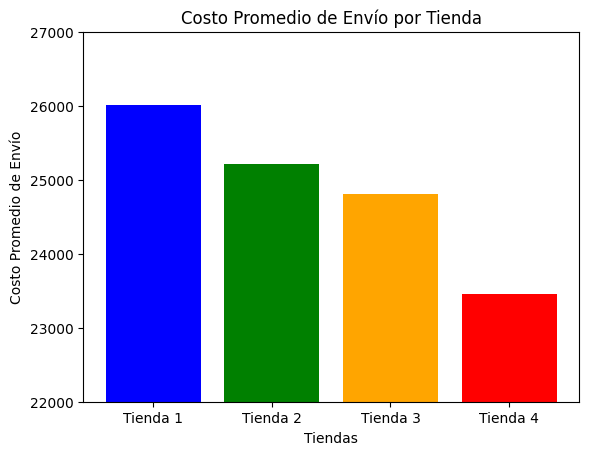

In [627]:
promedio_envios = []

def promedio_envio_tienda(tienda=[]):
  promedio_envio = tienda['Costo de envío'].mean()
  promedio_envio = float(round(promedio_envio, 2))
  return promedio_envio

for index, tienda in enumerate(tiendas, start=1):
  promedio_tienda = promedio_envio_tienda(tienda)
  promedio_envios.append(promedio_tienda)
  print(f"El promedio del costo de envío de la tienda {index} es de: {promedio_tienda}")
  print('---------------------------------------------------------')


colors=['blue', 'green', 'orange', 'red']
plt.bar(nombres_tiendas, promedio_envios, color=colors)
plt.xlabel('Tiendas')
plt.ylabel('Costo Promedio de Envío')
plt.title('Costo Promedio de Envío por Tienda')
plt.ylim(22000, 27000)
plt.show()

## Conclusión

Luego del análisis realizado podemos ver que la tienda 4 a pesar de que los costos de envio son menores tambien tiene los ingresos totales mas bajos con respecto a las otras tres tiendas, en cuanto a la calificación de las tiendas las cuatro se encuentran en un rago muy similar y aún así la tienda 4 se encuentra entre las dos mas bajas.

Basándome en el análisis realizado, se recomienda que el Sr. Juan debe vender la Tienda 4.

